In [52]:
!pip install seaborn

In [53]:
from zget_data import get_responses, get_qdetails, get_questions, page_map, quest_map, attention
from collections import defaultdict
import pandas as pd
import seaborn as sns
import json

In [54]:
password_response, time_response, survey_response, dids = get_responses()

Total: 120; 
Attentive: 104; Non Attentive: 16


## Password Analysis

In [55]:
pd.DataFrame(password_response)

,password2,password2_recall1,password2_recall2,password2_recall3
0,6IctttoCM^,NaN,NaN,NaN
1,1trdiayw$&,1trdiayw&$,1trdiayw&$,NaN
2,Chevy68#,NaN,NaN,NaN
3,igahot6844$,NaN,NaN,NaN
4,Password123!,NaN,NaN,NaN
...,...,...,...,...
99,bm@1994,NaN,NaN,NaN
100,Litn2023!,NaN,NaN,NaN
101,Isacd4md!,NaN,NaN,NaN
102,Ciara@9044,NaN,NaN,NaN


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,320.098,70.347,8.202,17.538,67.491,274.386,14.882,78.530,13.076,51.190,18.026,87.482,17.020800
1,10.255,32.479,18.423,107.595,84.749,322.202,17.036,101.708,27.493,65.827,68.461,60.278,15.275100
2,3.005,14.405,8.269,28.876,71.381,263.868,5.077,94.804,15.165,45.252,13.180,50.644,10.232100
3,47.552,27.253,9.852,122.930,47.599,223.082,24.884,69.051,16.381,40.184,21.445,95.529,12.429033
4,1.901,15.514,5.053,110.151,181.442,86.245,4.489,94.392,17.619,37.438,7.374,22.499,9.735283


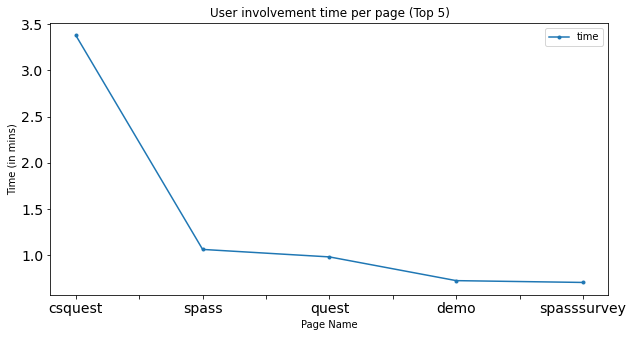

In [56]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [57]:
questions = get_questions()
survey_response_df = pd.DataFrame(survey_response)
display(survey_response_df.head(1))

survey_response_df['did'] = dids
survey_response_df.groupby(by='did').size().reset_index(name='counts')

,8,12,3,7,14
0,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '4', '1-4': '3'}","{'1-13': '2', '1-17': '7', '1-15': '7', '1-14'...","{'1-1': 'Woman', '2-1': '55-59 years old', '3-..."


,did,counts
0,1,26
1,2,26
2,3,26
3,4,26


### Quest

In [58]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,mean,median
rewarding,6.0,6.0,6.0,6.0,2.0,5.0,6.0,5.0,6.0,6.0,...,3.0,6.0,4.0,7.0,3.0,5.0,7.0,5.0,5.230769,6.0
organized,7.0,7.0,7.0,5.0,4.0,6.0,6.0,7.0,7.0,7.0,...,3.0,3.0,6.0,7.0,4.0,6.0,6.0,6.0,5.894231,6.0
structured,7.0,7.0,6.0,5.0,5.0,5.0,6.0,6.0,7.0,6.0,...,4.0,7.0,6.0,7.0,4.0,7.0,6.0,7.0,5.932692,6.0
well grouped,7.0,6.0,6.0,6.0,3.0,5.0,6.0,6.0,7.0,7.0,...,7.0,4.0,5.0,7.0,4.0,6.0,7.0,6.0,5.942308,6.0
ordered,7.0,6.0,6.0,5.0,3.0,6.0,6.0,5.0,7.0,7.0,...,3.0,2.0,7.0,7.0,3.0,6.0,6.0,7.0,5.461538,6.0
beneficial,7.0,7.0,6.0,6.0,2.0,6.0,5.0,6.0,5.0,7.0,...,2.0,7.0,6.0,7.0,4.0,6.0,6.0,5.0,5.548077,6.0
helpful,7.0,7.0,6.0,6.0,3.0,5.0,6.0,6.0,7.0,7.0,...,6.0,6.0,5.0,7.0,3.0,7.0,6.0,5.0,6.019231,6.0
easy,5.0,6.0,7.0,6.0,3.0,6.0,3.0,6.0,6.0,7.0,...,5.0,2.0,5.0,7.0,2.0,4.0,7.0,3.0,5.500000,6.0
appealing,6.0,7.0,6.0,6.0,2.0,4.0,4.0,4.0,7.0,6.0,...,6.0,1.0,5.0,7.0,2.0,5.0,6.0,6.0,5.432692,6.0
pleasant,4.0,7.0,7.0,6.0,3.0,3.0,6.0,4.0,6.0,6.0,...,6.0,1.0,5.0,7.0,2.0,6.0,6.0,5.0,5.557692,6.0


In [59]:
cats = {}
for k, v in quest_map.items():
    temp = quest.loc[v]
    cats[k] = temp

for k, v in cats.items():
    print(f'{k}: {v["mean"].mean()}')

Perspicuity: 5.586538461538462
Aesthetics: 5.1514423076923075
Usefulness: 5.5793269230769225
Clarity: 5.8076923076923075


### CSQuest

In [60]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())
qualindex = ['8-1', '10-1', '11-1']
csquestqual = csquest.loc[qualindex]
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
8-1,7,7,6,6,5,6,6,6,7,6,...,5,6,7,7,6,6,6,6,6,6
10-1,4,7,6,6,3,6,6,5,6,6,...,5,7,7,1,3,6,6,6,7,3
11-1,"I like the idea. I like the example phrase ""I ...",This is entertaining and relatable! It is an i...,I think the design looks nice and it was well ...,I think the strategy if easy to follow but I t...,I thought about if I would personally use this...,For me it is way too many steps as I already k...,"I like it, it is simple like texting with a fr...",It is nice. Simple to read and understand. S...,I like it. It gave me a way to come up with a ...,"Its good, useful and a good way to end up maki...",...,The desgin look very creativity and very easy ...,It was simple and clean.,The presentation was to clear and more advance...,"The presentation is clear and clean, it's nice...",It's in a simple comic format that nothing rea...,Clarity and coherence of the content.,Seems simple and affective. I wish the numbers...,I'm pretty certain that it will help me create...,It is very useful in guiding about the passwor...,The presentation is clear and concise. Straigh...


In [61]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

ValueError: setting an array element with a sequence.

### First Password Survey

In [ ]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,mean,median
"I do not change my passwords, unless I have to.",7,6,7,4,5,5,4,7,3,5,...,2,6,4,2,5,4,6,7,5.053435,5.0
I use different passwords for different online accounts that I have.,2,7,1,6,7,7,5,7,7,7,...,7,6,5,7,6,6,5,6,5.480916,6.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",1,7,3,5,6,6,4,7,5,7,...,6,7,6,7,6,6,6,7,5.122137,5.0
I do not include special characters in my password if it’s not required.,1,1,5,1,1,6,7,1,1,3,...,2,2,3,1,1,2,2,6,3.213740,3.0


### Second Password Survey

In [ ]:
normqsid = []
spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
spass.drop(attention.get('12'), inplace=True)
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,mean,median
strength of password,6,7,6,6,7,6,5,6,7,7,...,7,6,7,7,6,6,5,7,5.877863,6.000000
motivated after going through design,5,1,6,7,7,5,6,4,7,7,...,7,7,6,4,7,6,6,6,5.755725,6.000000
Hard to remember,1,7,2,6,6,6,4,3,1,1,...,3,2,4,7,7,5,3,7,4.305344,4.152672
Can be easily guessed by a hacker,2,1,3,1,1,5,4,1,1,1,...,1,2,2,1,1,2,3,6,2.961832,2.000000
Can be easily guessed by my close friends or family members,1,1,1,1,1,7,1,1,1,2,...,1,1,1,1,1,2,4,7,2.702290,2.000000
Stronger than the passwords I usually use,3,4,6,6,7,6,6,4,4,6,...,4,2,6,2,5,3,2,6,4.763359,5.000000


### Demographics

In [ ]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo.head()

,gender,age,race,highest education,education field,occupation,tech experience,cyber experience
0,Man,25-29 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,Pursuing or completed a degree
1,Man,35-39 years old,[Hispanic or Latino],High School Graduate,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,No experience
2,Man,18-24 years old,[White],Four-year College Degree,"Mathematics, and Natural Sciences (Physics, Ch...",Unemployed,No experience,No experience
3,Woman,30-34 years old,[White],Four-year College Degree,Other areas of Engineering,Non-profit organization,Pursuing or completed a degree,Formal training
4,Man,35-39 years old,[Native American or American Indian],Four-year College Degree,Business,Business or industry,Pursuing or completed a degree,Formal training


In [ ]:
demo['gender'].value_counts()
sns.countplot(data=demo, x='gender', order=demo.gender.value_counts().index)

NameError: name 'demo' is not defined

In [ ]:
display(demo['gender'].value_counts())
display(demo['race'].value_counts())
display(demo['highest education'].value_counts())
display(demo['tech experience'].value_counts())
display(demo['cyber experience'].value_counts())

Man           86
Woman         44
Non-Binary     1
Name: gender, dtype: int64

[White]                                 98
[Asian]                                 12
[Hispanic or Latino]                     7
[Black or African American]              5
[White, Hispanic or Latino]              4
[I prefer not to answer]                 2
[Native American or American Indian]     1
[mixed]                                  1
[Black or African American, Asian]       1
Name: race, dtype: int64

Four-year College Degree          78
High School Graduate              21
Graduate degree (MS/Doctorate)    19
Two-year College Degree           11
Less than High School              1
I prefer not to answer             1
Name: highest education, dtype: int64

Self-taught                       44
Pursuing or completed a degree    27
Hold or held a work position      24
Formal training                   19
No experience                     15
Telecommunication                  1
I prefer not to answer             1
Name: tech experience, dtype: int64

Self-taught                       37
No experience                     33
Formal training                   28
Pursuing or completed a degree    16
Hold or held a work position      13
I prefer not to answer             2
Training from Work                 1
Customer excutive                  1
Name: cyber experience, dtype: int64